In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")
dfgendersubmission = pd.read_csv("gender_submission.csv")
combine = [dftrain, dftest]

# Data Dictionary #

# Exploratory Analysis #  

In [3]:
#Dimensión de la base de datos
dftrain.shape 

(891, 12)

In [4]:
 #Información sobre las variables del dataframe
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Database heading#
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Dropping non useful variables
dftrain = dftrain.drop(["Name","Ticket","Fare", "Cabin"],axis=1) 
dftrain

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


In [7]:
#Total missing values#
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [34]:
#Replacing NaN with 0's
dftrain = dftrain.fillna(0)
dftrain.isnull().sum()

# 1.2 Embarked Class treatment #

In [31]:
# Embarked - Unique values
matriz= dftrain['Embarked'].unique() 
len(matriz) 
print(matriz)

['S' 'C' 'Q' 0]


In [28]:
#Most common Embarked class#
freq_port = dftrain.Embarked.dropna().mode()[0]
freq_port

'S'

In [29]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
dftrain[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,0,1.000000
1,C,0.553571
2,Q,0.389610
3,S,0.336957


In [30]:
#Converting Embarkedfill categorical feature to numeric#
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(float)

dftrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeBand
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,S,"(16.0, 32.0]"
2,1,1,female,38.0,1,0,C,"(32.0, 48.0]"
3,1,3,female,26.0,0,0,S,"(16.0, 32.0]"
4,1,1,female,35.0,1,0,S,"(32.0, 48.0]"
5,0,3,male,35.0,0,0,S,"(32.0, 48.0]"


## 1.2 Age treatment ## 

In [4]:
#Empty array to contain guessed Age values based on Pclass x Gender combinations#
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
#Iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = ( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                 dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(float)

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Age bands and correlations with Survived
dftrain['AgeBand'] = pd.cut(dftrain['Age'], 5)
dftrain[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [18]:
#Replace Age with ordinals based on these bands#
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
dftrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeBand
0,1,0,3,male,22.0,1,0,S,"(16.0, 32.0]"
1,2,1,1,female,38.0,1,0,C,"(32.0, 48.0]"
2,3,1,3,female,26.0,0,0,S,"(16.0, 32.0]"
3,4,1,1,female,35.0,1,0,S,"(32.0, 48.0]"
4,5,0,3,male,35.0,0,0,S,"(32.0, 48.0]"


C:\Users\7Camila\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


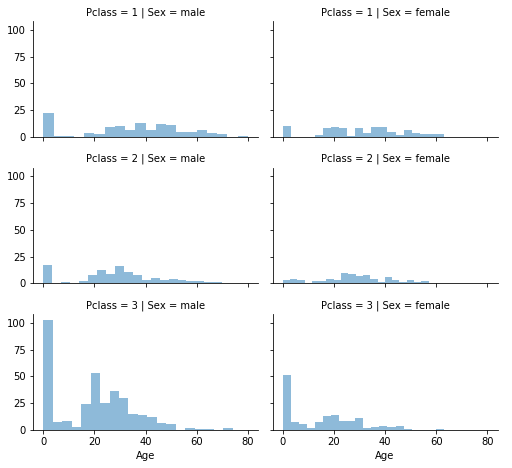

In [19]:
# grid = sns.FacetGrid(dftrain, col='Pclass', hue='Gender')
grid = sns.FacetGrid(dftrain, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [24]:
#Changing Index for Id Passanger 
dftrain = dftrain.set_index("PassengerId")
dftrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeBand
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,S,"(16.0, 32.0]"
2,1,1,female,38.0,1,0,C,"(32.0, 48.0]"
3,1,3,female,26.0,0,0,S,"(16.0, 32.0]"
4,1,1,female,35.0,1,0,S,"(32.0, 48.0]"
5,0,3,male,35.0,0,0,S,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,S,"(16.0, 32.0]"
888,1,1,female,19.0,0,0,S,"(16.0, 32.0]"
889,0,3,female,0.0,1,2,S,"(-0.08, 16.0]"


In [25]:
# Sex - Unique Values
matriz2= dftrain['Sex'].unique()
len(matriz2) 

2

## Demographic Analysis: ### 

In [37]:
#Checking the total number of passagers:
dftrain['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [36]:
# Percentage of women who survived:
women = dftrain.loc[dftrain.Sex == "female"]["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [38]:
# Percentage of male who survived:
male = dftrain.loc[dftrain.Sex == "male"]["Survived"]
rate_male = sum(male)/len(male)
print("% of male who survived:", rate_male)

% of male who survived: 0.18890814558058924


In [39]:
#Total persons according to class
dftrain['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
#Percentage of survivors according to class
firstclass = dftrain.loc[dftrain.Pclass == 1]["Survived"]
rate_firstclass = sum(firstclass)/len(firstclass)
print("% of first class peoples who survived", rate_firstclass)

secondclass = dftrain.loc[dftrain.Pclass == 2]["Survived"]
rate_secondclass = sum(secondclass)/len(secondclass)
print("% of second class peoples who survived", rate_secondclass)

thirdclass = dftrain.loc[dftrain.Pclass == 3]["Survived"]
rate_thirdclass = sum(thirdclass)/len(thirdclass)
print("% of third class peoples who survived", rate_thirdclass)

% of first class peoples who survived 0.6296296296296297
% of second class peoples who survived 0.47282608695652173
% of third class peoples who survived 0.24236252545824846


In [41]:
dftrain.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.799293,0.523008,0.381594
std,0.486592,0.836071,17.596074,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [42]:
# Sex - Ordinal to numerical
dftrain['Sex'].replace(['female','male'],[0,1],inplace=True) 

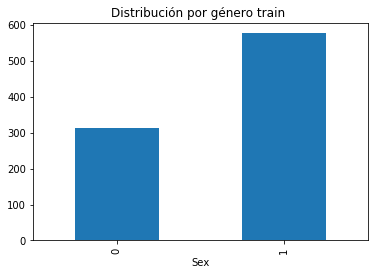

In [43]:
# Sex - Graph
dftrain.groupby('Sex').size().plot(kind='bar')
plt.title('Distribución por género train ')
plt.show()

In [44]:
#Survival probabilit
porcent_sobrevivientes = (dftrain[dftrain.Survived
                             > 0]['Survived'].count() * 1.0
       / dftrain['Survived'].count()) * 100.0
print("El porcentaje de sobrevivientes de la base de datos es {0:.2f}%"
      .format(porcent_sobrevivientes))

El porcentaje de sobrevivientes de la base de datos es 38.38%


# 2. Subset creation: Survivors #

In [46]:
dftrain_sobrevivientes = dftrain[dftrain.Survived > 0]
dftrain_sobrevivientes                               

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeBand
PassengerId,,,,,,,,
2,1,1,0,38.0,1,0,C,"(32.0, 48.0]"
3,1,3,0,26.0,0,0,S,"(16.0, 32.0]"
4,1,1,0,35.0,1,0,S,"(32.0, 48.0]"
9,1,3,0,27.0,0,2,S,"(16.0, 32.0]"
10,1,2,0,14.0,1,0,C,"(-0.08, 16.0]"
...,...,...,...,...,...,...,...,...
876,1,3,0,15.0,0,0,C,"(-0.08, 16.0]"
880,1,1,0,56.0,0,1,C,"(48.0, 64.0]"
881,1,2,0,25.0,0,1,S,"(16.0, 32.0]"


In [48]:
#Total data#
len(dftrain_sobrevivientes) 

342

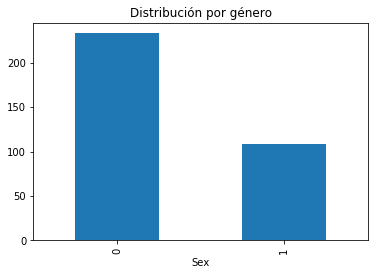

In [49]:
# Graph - Sex survivors
dftrain_sobrevivientes.groupby('Sex').size().plot(kind='bar')
plt.title('Distribución por género')
plt.show()  #Male=1 Female=0

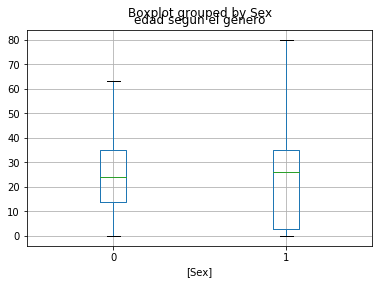

In [50]:
# Age according to gender
dftrain_sobrevivientes[(dftrain_sobrevivientes.Age <= 100)
             & (dftrain_sobrevivientes.Sex.isin(['0', '1'])
               )][['Age', 'Sex']].boxplot(by='Sex')
plt.title('edad segun el género')
plt.show()

In [51]:
# Survivor women's average age
dftrain_sobrevivientes[dftrain_sobrevivientes.Sex == 0][['Age']].mean()

Age    24.390558
dtype: float64

In [52]:
#Average class survivors
dftrain_sobrevivientes[['Pclass']].mean()

Pclass    1.950292
dtype: float64

In [53]:
# Survivor men's avarage age
dftrain_sobrevivientes[dftrain_sobrevivientes.Sex == 1][['Age']].mean()

Age    23.272202
dtype: float64

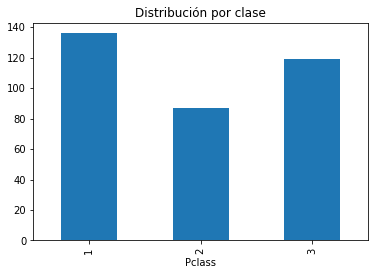

In [54]:
dftrain_sobrevivientes.groupby('Pclass').size().plot(kind='bar')
plt.title('Distribución por clase')
plt.show() 

In [55]:
pclass_gender_survival_count_df= dftrain.groupby(['Pclass','Sex'])['Survived'].sum()
dftrain.groupby(['Pclass','Sex']).count()
dftrain['count'] = 1 # agregar columna
dftrain.groupby(['Pclass','Sex','count']).count()
dftrain.groupby(['Pclass']).sum()

,Survived,Sex,Age,SibSp,Parch,count
Pclass,,,,,,
1,136,122,7111.42,90,77,216
2,87,108,5168.83,74,70,184
3,119,347,8924.92,302,193,491


In [56]:
pclass_gender_survival_count_df

Pclass  Sex
1       0      91
        1      45
2       0      70
        1      17
3       0      72
        1      47
Name: Survived, dtype: int64

In [7]:
pclass_gender_survival_count_df= dftrain.groupby(['Pclass','Age'])['Survived'].sum()
pclass_gender_survival_count_df

Pclass  Age  
1       0.92     1
        2.00     0
        4.00     1
        11.00    1
        14.00    1
                ..
3       61.00    0
        63.00    1
        65.00    0
        70.50    0
        74.00    0
Name: Survived, Length: 182, dtype: int64